# Introduction

Brief intro about Recommender Systems, so we get to know why do we perform recommendations:

Recommendations are the helpful tips which will help us to decide on things we are going to do. In our daily life we have different people who act as recommenders like sister/ girl friend to show dresses which we would like when we go to shop, professor who provides us a list of useful books on a topic, friends to suggest movies which we would like and so on... as this depends on the network which each individual will possess but we if need to look at unified recommendations there comes the online recommendations systems.

We have different applications of online recommendations where systems offering news articles to online newspaper readers, based on a prediction of reader interest or offering customers of an online retailer suggestions about what they might like to buy, based on their past history of purchases and/or product searches. So to give good suggestions to customers which there are unaware off and simultaneously to get benefits/profits from all the content which they possess online platforms use the application of recommender systems.

## Types of recommendation systems

There are 3 basic commonly used RS:
* Content Based RS
* Collaborative RS
* Hybrid RS

Below are other types briefly described which can be used as per the requirement, but will go deep about above mentioned RS: 
* Demographic based RS : This system aims to categorize the users based on attributes and make recommendations based on demographic classes. The benefit of a demographic approach is that it does not require a history of user ratings like that in collaborative and content based recommender systems.

* Utility based RS : Utility based recommender system makes suggestions based on computation of the utility of each object for the user. Of course, the central problem for this type of system is how to create a utility for individual users. In utility based system, every industry will have a different technique for arriving at a user specific utility function and applying it to the objects under consideration. The main advantage of using a utility based recommender system is that it can factor non-product attributes, such as vendor reliability and product availability, into the utility computation. This makes it possible to check real time inventory of the object and display it to the user.

* Knowledge based RS : This type of recommender system attempts to suggest objects based on inferences about a user’s needs and preferences. Knowledge based recommendation works on functional knowledge: they have knowledge about how a particular item meets a particular user need, and can therefore reason about the relationship between a need and a possible recommendation.

One can find the above types in detail [here](https://www.bluepiit.com/blog/classifying-recommender-systems/#:~:text=There%20are%20majorly%20six%20types,system%20and%20Hybrid%20recommender%20system.).

## Content based Recommendation System

***************Visualize when you read something***********

Content-Based systems focus on properties of items. Similarity of items is determined by measuring the similarity in their properties. In a content-based system, we must construct for each item a profile, which is a record or collection of records representing important characteristics of that item. In simple cases, the profile consists of some characteristics of the item that are easily discovered. 

**So w.r.t dataset which we use here those characteristics can be obtained from the cast, director, keywords , overview and genres of the movies.** 

Below we will see how can we obtain those characteristics and recommend similar movies w.r.t any movie. Content based doesnt depend on the ratings of the movie but only on the similar characteristics between movies. So basically we convert the text description of movies (after cleaning as required) into vectors using TD-IDF (will see below what this means) and find the cosine similarity between movies and recommend similar movies based on the highest cosine score (which means less angle between them hence identical/ similar kind of movies which user might like). **But here I would like to try it using deep learning, which we will see in the following.** There are some pros and cons for this type of RS below, but one can understand the pros and cons if they know what are the other types available which you will get to know by the end of the kernel:

**Pros**
* The content based method only has to analyze the items and a single user's profile for the recommendation, which makes the process less cumbersome
* Content based would thus produce more reliable results with fewer users in the system.
* The model can capture the specific interests of a user, and can recommend niche items that very few other users are interested in.

**Cons**
* The weakness of content based RS is its low serendipity and overspecialization leading it to recommend items as similar as possible to the ones a user already knows.
* Content based RS also ignores quality and popularity of items - For instance, two research papers may be considered equally relevant by a content based RS if the papers share the same terms with the user preference. This relevance might not always be justified, for example if one paper was written by an authority in the field and presents original results, while another paper was written by a student who paraphrases the results of other research papers. Ideally, a recommender system should recommend only the first paper but a content based RS would fail to do so.


Below we shall go through the dataset and understand the structure of it and how we can model a content based RS. 

First we shall import required things..

In [1]:
# Importing some of the required libraries, will use imports as and when ever required
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
import string
from ast import literal_eval

Using TensorFlow backend.


In credits.csv we have cast, crew , movie id columns

In [2]:
credits = pd.read_csv('../input/the-movies-dataset/credits.csv')

In [3]:
# type of credits data is str, so we need to change them to python list object so that we can fetch detals inside it easily
type(credits['cast'][0])

str

In [4]:
# checking whether there are any null values in credits
credits.isnull().sum()

cast    0
crew    0
id      0
dtype: int64

In [5]:
# we shall convert the features cast and crew to python objects
def load_data(data, columns):
    df = data.copy()
    for column in columns:
        df[column] = df[column].apply(literal_eval)
    return df

In [6]:
# loading data using above function which will convert str to list
credits = load_data(credits,['cast', 'crew'])

In [7]:
# peek into the data
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [8]:
# we can see how the features type has changed
type(credits['cast'][0])

list

In [9]:
# from casting details we shall pick the name identifier
credits['cast'][0]

[{'cast_id': 14,
  'character': 'Woody (voice)',
  'credit_id': '52fe4284c3a36847f8024f95',
  'gender': 2,
  'id': 31,
  'name': 'Tom Hanks',
  'order': 0,
  'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'},
 {'cast_id': 15,
  'character': 'Buzz Lightyear (voice)',
  'credit_id': '52fe4284c3a36847f8024f99',
  'gender': 2,
  'id': 12898,
  'name': 'Tim Allen',
  'order': 1,
  'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'},
 {'cast_id': 16,
  'character': 'Mr. Potato Head (voice)',
  'credit_id': '52fe4284c3a36847f8024f9d',
  'gender': 2,
  'id': 7167,
  'name': 'Don Rickles',
  'order': 2,
  'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'},
 {'cast_id': 17,
  'character': 'Slinky Dog (voice)',
  'credit_id': '52fe4284c3a36847f8024fa1',
  'gender': 2,
  'id': 12899,
  'name': 'Jim Varney',
  'order': 3,
  'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'},
 {'cast_id': 18,
  'character': 'Rex (voice)',
  'credit_id': '52fe4284c3a36847f8024fa5',
  'gender': 2,
  'id': 12900,
 

In [10]:
# here we are picking a specific identifier, combine parameter will remove the space between first and last names because our model should consider the entire name as single character
def pick_a_detail_from_list(obj, identifier,number_of_words = True, combine = False):
    
    df = obj.copy()
    for i in range(len(df)):
        df[i] = [j[identifier] for j in df[i]]
        # if we want to limit the number of details to take we can pass True for this parameter
        if number_of_words:
            if (len(df[i])  > 4):
                df[i] = df[i][:4]  
    # if we want to combine the first and last name of the person we can pass True for this parameter
    if combine:
        df = df.apply(lambda x : [str.lower(name.replace(" ","")) for name in x])
    return df

In [11]:
# listing out few names from cast column
credits['cast_name'] = pick_a_detail_from_list(credits['cast'],'name', True)

In [12]:
# can see how we obtained the list of 4 names of cast for each movie
credits.head(3)

,cast,crew,id,cast_name
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney]"
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,..."
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop..."


In [13]:
# details of crew
credits['crew'][0]

[{'credit_id': '52fe4284c3a36847f8024f49',
  'department': 'Directing',
  'gender': 2,
  'id': 7879,
  'job': 'Director',
  'name': 'John Lasseter',
  'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f4f',
  'department': 'Writing',
  'gender': 2,
  'id': 12891,
  'job': 'Screenplay',
  'name': 'Joss Whedon',
  'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f55',
  'department': 'Writing',
  'gender': 2,
  'id': 7,
  'job': 'Screenplay',
  'name': 'Andrew Stanton',
  'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f5b',
  'department': 'Writing',
  'gender': 2,
  'id': 12892,
  'job': 'Screenplay',
  'name': 'Joel Cohen',
  'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f61',
  'department': 'Writing',
  'gender': 0,
  'id': 12893,
  'job': 'Screenplay',
  'name': 'Alec Sokolow',
  'profile_path': '/v79vlRYi94BZUQnkkyzn

In [14]:
# similarly we can do for crew column, but for simplicity we will take only director name
def get_diro(x, identifier):
    for i in x:
        if i['job'] == identifier:
            return str.lower(i['name']).replace(" ","")
    return np.nan
credits['director'] = [get_diro(credits['crew'][j],identifier = 'Director') for j in range(len(credits['crew']))]
#credits['music'] = [get_diro(credits['crew'][j],identifier = 'Music') for j in range(len(credits['crew']))]

In [15]:
# Combining list of cast names into single string
credits['cast_name'] = credits['cast_name'].apply(lambda x : ' '.join(x))

In [16]:
# we can take a new dataframe and store only required things
credits_final = credits[['cast_name','director','id']].copy()

**Here from credits data we got the cast and director name, which we can use for identifying similar movies. Next we shall get info from keywords data**

In [17]:
# loading keywords data
keywords = pd.read_csv('../input/the-movies-dataset/keywords.csv')

keywords = load_data(keywords,['keywords'])



In [18]:
# peek into the data
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [19]:
# details of keywords column
keywords['keywords'][0]

[{'id': 931, 'name': 'jealousy'},
 {'id': 4290, 'name': 'toy'},
 {'id': 5202, 'name': 'boy'},
 {'id': 6054, 'name': 'friendship'},
 {'id': 9713, 'name': 'friends'},
 {'id': 9823, 'name': 'rivalry'},
 {'id': 165503, 'name': 'boy next door'},
 {'id': 170722, 'name': 'new toy'},
 {'id': 187065, 'name': 'toy comes to life'}]

In [20]:
# checking for null values
keywords.isnull().sum()

id          0
keywords    0
dtype: int64

In [21]:
# we shall take all the keywords without limiting to 4 top words as we did in for cast names
keywords['keys'] = pick_a_detail_from_list(keywords['keywords'], 'name', False, False)

In [22]:
# obtained list of keywords 
keywords.head(3)

,id,keywords,keys
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[jealousy, toy, boy, friendship, friends, riva..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[board game, disappearance, based on children'..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[fishing, best friend, duringcreditsstinger, o..."


In [23]:
# combining list of keywords into single string
keywords['keys'] = keywords['keys'].apply(lambda x : ' '.join(x))

In [24]:
# splitting required columns from keywords data
keywords_final = keywords[['keys','id']].copy()

**Now movies_metadata file**

In [25]:
# loading metadata file
metadata = pd.read_csv('../input/the-movies-dataset/movies_metadata.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
# peek into the data
metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [27]:
# Checking for null values
metadata.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [28]:
# we shall take genres and overview from metadata, but only genre need to be converted into python object 
metadata = load_data(metadata,['genres'])

In [29]:
# details of genres column
metadata['genres'][0]

[{'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 10751, 'name': 'Family'}]

In [30]:
# obtainng list of genres for movies
metadata['genre'] = pick_a_detail_from_list(metadata['genres'], 'name', False, True)

In [31]:
# converted list of genres
metadata['genre']

0         [animation, comedy, family]
1        [adventure, fantasy, family]
2                   [romance, comedy]
3            [comedy, drama, romance]
4                            [comedy]
                     ...             
45461                 [drama, family]
45462                         [drama]
45463       [action, drama, thriller]
45464                              []
45465                              []
Name: genre, Length: 45466, dtype: object

In [32]:
# Joining list of genres into one single string
metadata['genre'] = metadata['genre'].apply(lambda x : ' '.join(x))

In [33]:
# Splitting required data from metadata set
metadata_final = metadata[['genre','overview','id', 'original_title']].copy()


### Now we got all the required information from different files in _final dataset, lets combine them

In [34]:
# Merging all three datasets (credits, keywords, metadata)
cbrs_final = credits_final.merge(keywords_final, on= 'id', how = 'inner')


In [35]:
# in metadata we have "id" as int so changing to str
cbrs_final['id'] = cbrs_final['id'].astype('str')

In [36]:
cbrs_final = cbrs_final.merge(metadata_final, on = 'id')

In [37]:
# peek into the combined data
cbrs_final.head(3)

,cast_name,director,id,keys,genre,overview,original_title
0,Tom Hanks Tim Allen Don Rickles Jim Varney,johnlasseter,862,jealousy toy boy friendship friends rivalry bo...,animation comedy family,"Led by Woody, Andy's toys live happily in his ...",Toy Story
1,Robin Williams Jonathan Hyde Kirsten Dunst Bra...,joejohnston,8844,board game disappearance based on children's b...,adventure fantasy family,When siblings Judy and Peter discover an encha...,Jumanji
2,Walter Matthau Jack Lemmon Ann-Margret Sophia ...,howarddeutch,15602,fishing best friend duringcreditsstinger old men,romance comedy,A family wedding reignites the ancient feud be...,Grumpier Old Men


In [38]:
# since we didnt process overview anywhere we have to lower the string in overview and remove punctuations, digits
cbrs_final['overview'] = cbrs_final['overview'].apply(lambda x : str(x).lower().translate(str.maketrans("","",string.punctuation+string.digits)))

In [39]:
cbrs_final.head(3)

,cast_name,director,id,keys,genre,overview,original_title
0,Tom Hanks Tim Allen Don Rickles Jim Varney,johnlasseter,862,jealousy toy boy friendship friends rivalry bo...,animation comedy family,led by woody andys toys live happily in his ro...,Toy Story
1,Robin Williams Jonathan Hyde Kirsten Dunst Bra...,joejohnston,8844,board game disappearance based on children's b...,adventure fantasy family,when siblings judy and peter discover an encha...,Jumanji
2,Walter Matthau Jack Lemmon Ann-Margret Sophia ...,howarddeutch,15602,fishing best friend duringcreditsstinger old men,romance comedy,a family wedding reignites the ancient feud be...,Grumpier Old Men


In [40]:
# checking for null values in final dataset ready for converting into vectors
cbrs_final.isnull().sum()

cast_name           0
director          917
id                  0
keys                0
genre               0
overview            0
original_title      0
dtype: int64

In [41]:
len(cbrs_final)

46628

In [42]:
cbrs_final.drop_duplicates(inplace= True)

In [43]:
len(cbrs_final)

45433

In [44]:
# now lets combine all the text columns into one 

column_text = ['overview','cast_name','genre','director','keys']
cbrs_final['movie_info'] = cbrs_final[column_text].apply(lambda x : ' '.join(x.astype(str)), axis =1)

In [45]:
cbrs_final.head(2)

,cast_name,director,id,keys,genre,overview,original_title,movie_info
0,Tom Hanks Tim Allen Don Rickles Jim Varney,johnlasseter,862,jealousy toy boy friendship friends rivalry bo...,animation comedy family,led by woody andys toys live happily in his ro...,Toy Story,led by woody andys toys live happily in his ro...
1,Robin Williams Jonathan Hyde Kirsten Dunst Bra...,joejohnston,8844,board game disappearance based on children's b...,adventure fantasy family,when siblings judy and peter discover an encha...,Jumanji,when siblings judy and peter discover an encha...


In [46]:
# sample movie info for first movie #Toy Story
cbrs_final['movie_info'][0]

'led by woody andys toys live happily in his room until andys birthday brings buzz lightyear onto the scene afraid of losing his place in andys heart woody plots against buzz but when circumstances separate buzz and woody from their owner the duo eventually learns to put aside their differences Tom Hanks Tim Allen Don Rickles Jim Varney animation comedy family johnlasseter jealousy toy boy friendship friends rivalry boy next door new toy toy comes to life'

In [47]:
# now we shall see traditional content based RS by using cosine similarity
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
movie_matrix = count.fit_transform(cbrs_final['movie_info'])

In [48]:
# lets map movie to index so that we can fetch recommendations
index_movie = pd.Series(cbrs_final.index, index=cbrs_final['original_title'])

In [62]:
# Functions for obtaining recommendations given title and similarity matrix
def cbrs_recommendations(title, similarity_matrix):
    # Get the index of the movie that matches the title
    idx = index_movie[title]

    # Get the pairwsie similarity scores of all movies with that movie
    similarity = list(enumerate(similarity_matrix[idx]))

    # Sort the movies based on the similarity scores
    similarity = sorted(similarity, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    similarity = similarity[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in similarity]

    # Return the top 10 most similar movies
    return cbrs_final['original_title'].iloc[movie_indices]

In [50]:
movie_matrix.shape

(45433, 138225)

In [51]:
# the matrix shape is so large and using more than allocated memory so lets use the movies present in links_small.csv
links = pd.read_csv('../input/the-movies-dataset/links_small.csv')

In [52]:
# Checking for null values in links data, our concentration is on tmdbId column since in other datasets we have id which is tmdbID in links
links.isnull().sum()

movieId     0
imdbId      0
tmdbId     13
dtype: int64

In [53]:
# since we have null in our required column removing null columns
links.dropna(axis =0,inplace=True)

In [54]:
links.dtypes

movieId      int64
imdbId       int64
tmdbId     float64
dtype: object

In [55]:
# in links_small data we have id as float so changing to str, first changing to int and then str because if we directly change to str we get string as '862.0' instead of '862'
links['tmdbId'] = links['tmdbId'].astype(int)
links['tmdbId'] = links['tmdbId'].astype('str')
cbrs_small = cbrs_final.merge(links, left_on = 'id', right_on = 'tmdbId')

In [56]:
# peek into the final dataset
cbrs_small.head(4)

,cast_name,director,id,keys,genre,overview,original_title,movie_info,movieId,imdbId,tmdbId
0,Tom Hanks Tim Allen Don Rickles Jim Varney,johnlasseter,862,jealousy toy boy friendship friends rivalry bo...,animation comedy family,led by woody andys toys live happily in his ro...,Toy Story,led by woody andys toys live happily in his ro...,1,114709,862
1,Robin Williams Jonathan Hyde Kirsten Dunst Bra...,joejohnston,8844,board game disappearance based on children's b...,adventure fantasy family,when siblings judy and peter discover an encha...,Jumanji,when siblings judy and peter discover an encha...,2,113497,8844
2,Walter Matthau Jack Lemmon Ann-Margret Sophia ...,howarddeutch,15602,fishing best friend duringcreditsstinger old men,romance comedy,a family wedding reignites the ancient feud be...,Grumpier Old Men,a family wedding reignites the ancient feud be...,3,113228,15602
3,Whitney Houston Angela Bassett Loretta Devine ...,forestwhitaker,31357,based on novel interracial relationship single...,comedy drama romance,cheated on mistreated and stepped on the women...,Waiting to Exhale,cheated on mistreated and stepped on the women...,4,114885,31357


In [57]:
# now we shall get cosine similarity for the small data, obtaining count vectorized matrix

movie_matrix1 = count.fit_transform(cbrs_small['movie_info'])

In [58]:
# using cosine similairty from pairwise library we can compute cosine similarity for all the movies 
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(movie_matrix1, movie_matrix1)

# Recommendations of traditional Content Based RS

In [63]:
# Obtaining recommendations from the function created above 
cbrs_recommendations('The Man from Beyond', cos_sim)

5610                                The Mechanic
7575                       Ride the High Country
5163                               Stolen Summer
544     Thirty Two Short Films About Glenn Gould
5351                       The Manhattan Project
949                      They Made Me a Criminal
9000                                  Moonwalker
7137                             Platinum Blonde
5525                           Le fate ignoranti
6110                      A Prayer for the Dying
Name: original_title, dtype: object

# Collaborative Recommendation Systems

Collaborative Filtering (CF) is a mean of recommendation based on users’ past behavior. There are two categories of CF:

User-based: measure the similarity between target users and other users
Item-based: measure the similarity between the items that target users rates/ interacts with and other items

The key idea behind CF is that similar users share the same interest and that similar items are liked by a user.

Assume there are m users and n items, we use a matrix with size m* n to denote the past behavior of users. Each cell in the matrix represents the associated opinion that a user holds. For instance, M_{i, j} denotes how user i likes item j. Such matrix is called utility matrix.

Instead of using features of items to determine their similarity, we focus on the similarity of the user ratings for two items. That is, in place of the item-proﬁle vector for an item, we use its column in the utility matrix. Further, instead of contriving a proﬁle vector for users, we represent them by their rows in the utility matrix. Users are similar if their vectors are close according to some distance measure such as Jaccard or cosine distance. Recommendation for a user U is then made by looking at the users that are most similar to U in this sense, and recommending items that these users like

User based:
User based is  by looking at the similar users, which means similar rows in utility matrix. Look at below examle of a utility matix:

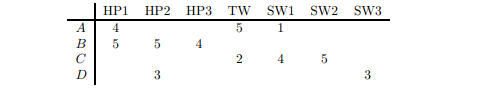

Movies are Harry potter series, star wars series and Twilight.

For traditional methods we can use Jaccard or cosine similarity between users.

****Jaccard Distance****

We could ignore values in the matrix and focus only on the sets of items rated. If the utility matrix only reflected purchases, this measure would be a good one to choose. However, when utilities are more detailed ratings, the Jaccard distance loses important information.

**Cosine Distance**

We can treat blanks as a 0 value. This choice is questionable, since it has the effect of treating the lack of a rating as more similar to disliking the movie than liking it.

Item based is also similar to the user based but we look for item profiles which means columns in the utility matrix.


# SVD
But here we shall see how SVD can be used to obtain a small matrices using the bigger utility matrix.

An entirely different approach to estimating the blank entries in the utility matrix is to conjecture that the utility matrix is actually the product of two long, thin matrices. This view makes sense if there are a relatively small set of features of items and users that determine the reaction of most users to most items.

Consider movies as a case in point. Most users respond to a small number of features; they like certain genres, they may have certain famous actors or actresses that they like, and perhaps there are a few directors with a significant following. If we start with the utility matrix M, with m rows and n columns (i.e., there are m users and n items), then we might be able to find a matrix U with m rows and d columns and a matrix V with d rows and n columns, such that UV closely approximates M in those entries where M is nonblank. If so, then we have established that there are d dimensions that allow us to characterize both users and items closely. We can then use the entry in the product UV to estimate the corresponding blank entry in utility matrix M. This process is called UV-decomposition of M.

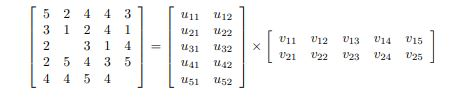

**But how do we achieve decomposition ?** We need to use some loss function to analyze how close our constructed matrix is to the utility matrix. We can use RMSE:

1. Sum, over all nonblank entries in M the square of the difference between that entry and the corresponding entry in the product UV .
2. Take the mean (average) of these squares by dividing by the number of terms in the sum (i.e., the number of nonblank entries in M).
3. Take the square root of the mean

Minimize the loss.

**But how do we update ?**

So to start with we can initialize U and V matrices with some random value or with all 1's, and we get some loss. Then we can minimize that loss by using incremental computation, which means:

In the below example of UV decomposition we take one entry as a variable and others as 1, then we try to find the value of x which would greatly minimize our loss.

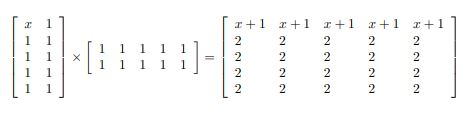

With the above utility matrix in first figure, we can find out the errors corresponding to first row, 



Sum simplifies to:



We want the value of x that minimizes the sum, so we take the derivative and set that equal to 0, which gives us the value of x as 2.6 . Similarly we can find the optimum value for all other entry and construct UV decomposition. 

**Then for any blank value in the utility matrix we just need to find the dot product of U and V marix corresponding to that user and Baaam, we can find all blank values and recommend the item which user would like and give high rating.**

ENOUGH about thoery i guess, lets go into playing with matrices.



In [72]:
# By using surprise dataset we can achieve SVD
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
reader = Reader()
ratings = pd.read_csv('../input/the-movies-dataset/ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [70]:
# Removing timestamp and loading to surprise dataset(It must have three columns, corresponding to the user (raw) ids, the item (raw) ids, and the ratings, in this order.)
ratings_data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [71]:
# now we can initialize the SVD
svd = SVD()

In [74]:
# now we can evaluate SVD
cross_validate(svd, ratings_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9024  0.8964  0.8972  0.8923  0.8894  0.8955  0.0044  
MAE (testset)     0.6923  0.6886  0.6911  0.6896  0.6871  0.6898  0.0018  
Fit time          9.41    9.36    9.36    9.36    9.33    9.36    0.03    
Test time         0.30    0.28    0.28    0.30    0.68    0.37    0.16    


{'test_rmse': array([0.90237811, 0.89636331, 0.89717375, 0.89227682, 0.88942066]),
 'test_mae': array([0.69228445, 0.68864049, 0.69113546, 0.68964036, 0.6871259 ]),
 'fit_time': (9.411340475082397,
  9.359334230422974,
  9.359063386917114,
  9.357758283615112,
  9.330614566802979),
 'test_time': (0.2976045608520508,
  0.28302645683288574,
  0.28488779067993164,
  0.30286502838134766,
  0.6812548637390137)}

In [75]:
# now we can fit our model
train = ratings_data.build_full_trainset()
svd.fit(train)

In [78]:
# predict (we need to provide userid itemid and  true rating,if we have. if we need for any iteam we can mention it as 0)
svd.predict(1, 1029, 3)

Prediction(uid=1, iid=1029, r_ui=3, est=2.862108647105714, details={'was_impossible': False})

# Conclusion

Content based will work well we have more features for items and for the items which dont have a good feature set, content based will suffer. Also content based will not consider the rating factor where ending up in recommending items which user might give less rating or would not like.

Whereas collaborative works well with the rating factor but it has cold start problem, which means when the system gets a new user or new item it fails to recommend properly. So we can use hybrid mechanism which can solve this problems.

### In next update will be adding Deep learning models and hybrid RS 
